# 뉴럴 네트워크 (Neural Network)

Date: 2019-8-29  
Author: skettee  
Categories: Deep Learning, Neural Network  
Tags: 딥러닝, 뉴럴 네트워크, 원-핫 인코딩, 소프트맥스
<!--eofm-->


딥러닝의 세계로 들어가기 위해 알아야 하는 세번째 모델인 뉴럴 네트워크(Neural Network)에 대해 알아보고 keras를 이용해서 모델링을 해보자!
<!--more-->

실제로 돌려 보고 싶으면 구글 코랩으로 ~  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skettee/notebooks/blob/master/neural_network.ipynb)

## 문제 (Problem)

💰 고객

> 덕분에 친추가 되었어요. 고마워요~
>
> 그 친구가 숙제를 부탁했는데... 해결해 주세요.
>
> 아래와 같이 입력과 출력을 하는 프로그램이 필요해요.  
>
> 입력: 1 0 0 0 0 0 0 0 0 0, 출력: 0  
> 입력: 0 1 0 0 0 0 0 0 0 0, 출력: 1  
> 입력: 0 0 1 0 0 0 0 0 0 0, 출력: 2  
> 입력: 0 0 0 1 0 0 0 0 0 0, 출력: 3  
> 입력: 0 0 0 0 1 0 0 0 0 0, 출력: 4  
> 입력: 0 0 0 0 0 1 0 0 0 0, 출력: 5  
> 입력: 0 0 0 0 0 0 1 0 0 0, 출력: 6  
> 입력: 0 0 0 0 0 0 0 1 0 0, 출력: 7   
> 입력: 0 0 0 0 0 0 0 0 1 0, 출력: 8   
> 입력: 0 0 0 0 0 0 0 0 0 1, 출력: 9     
>  
> 데이터는 아래에 있어요.  

In [1]:
input_data = [
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
]

output_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

⚙️ 엔지니어

> 이건 제가 코딩해서 바로 만들어 드릴 수 있습니다!  

In [2]:
import numpy as np

def human_coding(x):
    for i in range(len(x)):
        if x[i] == 1:
            return i
    return None

test_data =  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
result = human_coding(test_data)
print('input data is {} and ouput is {}'.format(test_data, result))

input data is [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] and ouput is 5


💰 고객

> 아... 조건이 있어요.  
>
> 2-레이어 뉴럴 네트워크(NN)로 만들어 주세요.  
> 히든 레이어(hidden layer)는 3개의 유닛들(units)로 구성되게 해 주세요.  

⚙️ 엔지니어

> ㅅㅂ

## 뉴럴 네트워크(Neural Network) 구성

### 뉴런 모델 (Neuron model)

뉴런(Neuron) 모델 은 앞에서 학습한 로지스틱 모델과 같다.  
예를 들어서 3개의 변수($x_1$, $x_2$, $x_3$)를 입력 받을 경우    
$z=w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$가 되고  
$a=\sigma(z)$ 가 된다.  
아래 그림과 같이 표현 된다.  

![뉴런 모델](https://skettee.github.io/post/neural_network/neuron_model.png)

### 뉴럴 네트워트(Neural Network)

뉴럴 네트워트(Neural Network)는  
하나의 뉴런, 즉 로지스틱 모델을 **유닛(Unit)** 이라고 하고   
유닛들을 서로 연결한 구조이다.  
유닛들을 모아서 **레이어(Layer)** 를 형성하고  
레이어를 (오른쪽으로) 계속해서 쌓아가는 모양을 가지고 있다.  

아래 그림은  
2-레이어 (2-layer) 뉴럴 네트워크이다.  
4개의 유닛(4-units)들로 구성된 히든 레이어(hidden layer) 1개와   
1개의 유닛(1-unit)으로 구성된 출력 레이어(output layer) 1개로 되어 있다.   

![뉴럴 네트워크](https://skettee.github.io/post/neural_network/neural_network.png)

## 데이터 분석 (Data Analysis)

이 문제는 데이터의 규칙에 따라 출력값을 결정하는 것이다.  

10개의 입력값 중에  
- 첫번째 입력값이 1이고 나머지가 0이면 출력값은 0  
- 두번째 입력값이 1이고 나머지가 0이면 출력값은 1  
-   ...    

이 규칙을 학습 시켜서 원하는 출력값으로 분류하는 것이 목표다.  

## 데이터 변환 (Data Transformation)

Keras가 원하는 입력과 출력의 모양(shape)는 다음과 같다.  

- (batch_size, input_dimension)    
- batch_size는 학습할 데이터의 개수이다.  
- input_demension은 학습을 할 때에 사용할 입력 변수의 개수이다.  

**입력 데이터 변환**  

In [3]:
print('batch_size= ', len(input_data))

batch_size=  10


In [4]:
print('input_dimension= ', len(input_data[0]))

input_dimension=  10


In [5]:
import numpy as np

x = np.array(input_data)
print('x.shape is ', x.shape)
print('\nx is \n', x)

x.shape is  (10, 10)

x is 
 [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


**출력 데이터 변환**

⚙️ 엔지니어

> yes or no 문제라면 0과 1로 변환 하면 된다.     
> 이번 문제는 0에서 9까지 10개다.  
> 출력 데이터를 어떻게 변환해야 할까?  

### 원-핫 인코딩 (One-hot encoding)

'강아지', '고양이', '토끼'를 분류하는 문제가 있다고 하자  
손실 함수(loss function)를 계산하기 위해서는 출력 데이터를 숫자로 표시 해야 한다.  

Label | 숫자
--------|---
강아지 | 0
고양이 | 1
토끼    | 2

시그모이드(Sigmoid)나 소프트맥스(softmax)와 같은 활성 함수(activation function)을 사용하기 위해서는 각 레이블(label)이 0과 1로 표현 되어야 한다. 원-핫-인코딩은 '강아지', '고양이', '토끼'를 0과 1로 표현하는 방법이다.

Label | 숫자 | 원-핫 벡터
--------|-------|---
강아지 | 0    | [1, 0, 0]
고양이 | 1    | [0, 1, 0]
토끼    | 2    | [0, 0, 1]


⚙️ 엔지니어

> 아하~    
> 0에서 9까지의 값을   
> 원-핫 벡터 (one-hot vector)로 표시하면 되겠군  

In [6]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(output_data)
print('y.shape is ', y.shape)
print('\none-hot encoded y is \n', y)

y.shape is  (10, 10)

one-hot encoded y is 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


⚙️ 엔지니어

> 엇... 어어... 입력 데이터와 출력 데이터가 ???  

## 모델링 (Modeling)

입력 레이어(input layer)는 $x_1$에서 $x_{10}$까지 10개로 되어 있다.   
히든 레이어(hidden layer)는 3개의 units로 구성 한다.  
출력 레이어(output layer)는 10개의 units로 구성 한다.  
그림으로 나타내면 다음과 같다.  

⚙️ 엔지니어

> 선들이 빠짐 없이 조밀하게 연결 되어 있다.  
> 음... **덴스(Dense)** 하게 연결 되어있군...   

![오토 코딩 모델](https://skettee.github.io/post/neural_network/auto_coding_model.png)

히든 레이어에 있는 유닛들의 활성함수(activation function)는 sigmoid로 한다.   
출력 레이어에 있는 유닛들의 활성함수(activation function)를 sigmoid로 하면 ~~ㅈ된다~~안된다.  
왜냐하면  
각 확률의 총합은 1이 나와야 하는데   
sigmoid는   
$\hat y_{1}+\hat y_{2}+\hat y_{3}+\hat y_{4}+\hat y_{5}+\hat y_{6}+\hat y_{7}+\hat y_{8}+\hat y_{9}+\hat y_{10}=1$ 을 만족하지 않는다.  

⚙️ 엔지니어

>  걱정마라.  엔지니어를 갈아서 만든 것이 있다.  
>  그것은 바로...

### 소프트맥스 회귀 (Softmax Regression)

0과 1, 두가지의 경우에 대한 분류는 로지스틱 회귀(logistic regression)로 모델링을 한다.  
세가지 이상에 대한 분류는 소프트맥스 회귀(softmax regression)로 모델링을 한다.  
소프트맥스의 활성 함수(activation function)는 아래와 같이 정의한다.  

$z=w^{T}x+b$,  
$a=\sigma(z) = {{e^z}\over{\sum_{j=1}^{m} e^z}}$,  
$m=$ number of classes (분류 개수)

**소프트맥스 회귀를 이용한 분류**

3개로 분류된 아래 데이터를 가지고 10X10 공간을 3개의 클래스로 분류해 보자.  
여기서 **클래스(Class)** 란 '공통적인 성질을 가진 종류'라는 뜻이다.  

In [18]:
import numpy as np

x_data = np.array([
    (1,4), (1,5), (1,6), (1,7), (1,8), (2,5), (2,6), (2,7), (2,8), (2,9), 
    (3,6), (3,7), (3,8), (3,9), (4,7), (4,8), (4,9), (5,8), (5,9), (6,9),
    (3,1), (4,1), (4,2), (5,1), (5,2), (5,3), (6,1), (6,2), (7,1), (8,1),
    (7,5), (8,4), (8,5), (8,6), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8)
])

y_data = np.array([
    [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], 
    [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0],
    [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0],
    [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1]
])

label_data = ['red', 'green', 'blue']

x_data를 그래프로 표시하면 아래와 같다.  
y_data에서 [1,0,0]은 빨강, [0,1,0]은 초록, [0,0,1]은 파랑으로 클래스를 구분한다.    

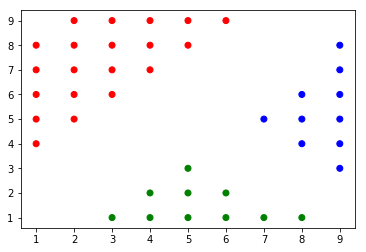

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter([x[0] for x in x_data ], [x[1] for x in x_data], color=[label_data[i] for i in [np.argmax(x) for x in y_data]])
plt.show()

소프트맥스 회귀 모델은 Keras로 간단하게 모델링할 수 있다.

![소프트맥스 회귀 모델](https://skettee.github.io/post/neural_network/softmax_regression.png)

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

# 모델을 준비한다.
model = Sequential()
# 입력 변수 x가 2개, unit 개수가 3개인 output layer를 생성한다.
model.add(Dense(3, input_shape=(2,), activation='softmax'))
# Loss funtion과 Optimizer를 선택한다.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
# epochs만큼 반복해서 손실값이 최저가 되도록 모델을 훈련한다.
hist = model.fit(x_data, y_data, epochs=1000, verbose=0)

반복 학습할 수록 손실 값이 0에 가깝게 줄어 든다.

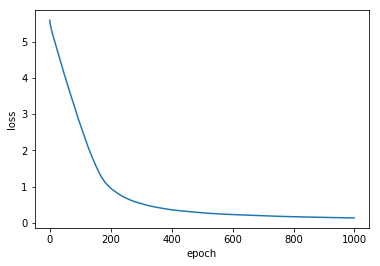

In [21]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

첫번째 x 데이터 (1,4)에 대해서 소프트맥스가 예측한 데이터는 다음과 같다.  
예측된 확률을 모두 더하면 1이 되는 것을 확인할 수 있다. 

In [26]:
predict = model.predict(x_data[0].reshape(1, 2))
print('y data is ', y_data[0])
print('predicted y data is ', predict[0])
print('sum of probability is ', np.sum(predict[0]))

y data is  [1 0 0]
predicted y data is  [0.980123   0.0051288  0.01474817]
sum of probability is  0.99999994


학습이 완료된 소프트맥스 회귀 모델을 이용해서  
10X10 공간을 3개의 클래스로 분류한 그래프를 그려 보자.  

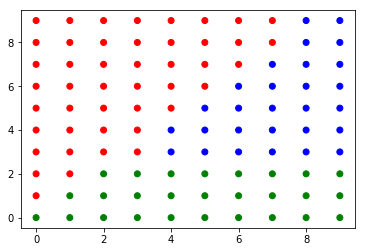

In [12]:
x_data = []
y_data = []
c_data = []
for i in range(10):
    for j in range(10):
        x_data.append(i)
        y_data.append(j)
        c_data.append(label_data[np.argmax(model.predict(np.array([i, j]).reshape(1, 2))[0])])

plt.scatter(x_data, y_data, color=c_data)
plt.show()

⚙️ 엔지니어

> 스스로 학습해서  
> 근처에 있는 땅을 자기것으로 만들면서  
> 천하삼분지계 하고 있다!!!  

### 정리

뉴럴 네트워크 모델(Neural Network model)을 만드는 방법을 정리해 보자.  
1. 데이터를 변환한다.    
  1. 입력 데이터의 형식과 모양을 변환한다.  
  2. 출력 데이터의 형식과 모양을 변환한다. **원-핫 인코딩(one-hot encoding)** 을 사용한다.  
2. **히든 레이어(hidden layer)**  정의  
  1. 히든 레이어 개수를 정의한다. 여기서는 1-hidden layer를 사용한다.  
  2. 히든 레이어 유닛 개수를 정의한다. 여기서는 3개이 유닛을 사용한다.  
  3. 활성 함수(activation function)를 정의한다. 여기서는 **시그모이드(sigmoid)** 를 사용한다.  
3. **출력 레이어(output layer)**  정의   
  1. 출력 레이어 유닛 개수를 정의한다. 여기서는 10개의 클래스로 분류해야 되니까 10개의 유닛을 사용한다.  
  2. 활성 함수(activation function)를 정의한다. 여기서는 **소프트맥스(softmax)** 를 사용한다.
4. 손실 함수 (Loss function)를 정의한다. 여기서는 **크로스-엔트로피 손실(cross-entropy loss)** 를 사용한다.  
  5. 옵티마이저(Optimizer)를 정의한다. 여기서는 **RMSProp** 을 사용한다.  
4. 반복할 회수(epoch)를 결정한다.  
5. 주어진 조건으로 모델을 최적화(fit) 시킨다.  

## 텐서플로우(Tensorflow)로 모델링(Modeling)

**케라스(Keras)** 를 이용해서 구현을 해보자!  

### 정규화 (Normalization)

⚙️ 엔지니어  

> 정규화 할거 없음!  
> 0과 1로 되어 있는데 뭔... 필요???  

In [13]:
X_train = x
Y_train = y

### Keras를 가지고 모델링(Modeling)하기

⚙️ 엔지니어

> 5줄로 모델링이 가능하다!   
> 
> 프랑소와 숄레 만세!

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 모델을 준비한다.
model = Sequential()
# unit 개수가 3이고 입력 변수 x가 10개인  hidden layer를 생성하고 dense하게 연결한다.
model.add(Dense(3, input_shape=(10,), activation='sigmoid'))
# unit 개수가 10인 output layer를 생성하고 dense하게 연결한다.
model.add(Dense(10, activation='softmax'))
# Loss funtion과 Optimizer를 선택한다.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
# epochs만큼 반복해서 손실값이 최저가 되도록 모델을 훈련한다.
hist = model.fit(X_train, Y_train, epochs=10000, verbose=0)

### 손실값의 변화를 그래프로 확인

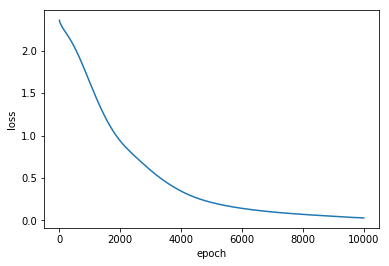

In [15]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

⚙️ 엔지니어

> 반복적으로 학습할 수록 손실(Loss)이 0에 가깝게 된다.  
> 나이스!

## 해결 (Solution)

⚙️ 엔지니어  

> 고객님~ 원하시는 솔루션입니다.   
> test_data에 원하시는 값을 입력하시면    
> 원하시는 결과값이 출력 됩니다.  

In [16]:
def auto_coding(x):
    input_data = np.array(x).reshape(1, 10)
    predict = model.predict(input_data)
    return np.argmax(predict[0])

test_data =  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
result = auto_coding(test_data)
print('input data is {} and ouput is {}'.format(test_data, result))

input data is [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] and ouput is 5


⚙️ 엔지니어  

> 내가 만든 human_coding과  
> 같은 결과가 나온다   
>
> 이것은  
> 히든 레이어에서   
> 학습에 의해서  
> 자동으로 코딩이 되었다는 것이다.  
>
> 여기서 문제는  
> 히든 레이어에서의 $w$와 $b$ 값들이  
> 왜 이런 값을 가지는지  
> 인간은 모른다는 것이다.  
> 그래서  
> Hidden(숨은) 레이어 라고 한다.  
